### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline  

### Preprocessing data

In [3]:
train=pd.read_csv("train.csv") #Reading the .csv file
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
5,6,0,3,male,NaN,0,0,8.4583
6,7,0,1,male,54.0,0,0,51.8625
7,8,0,3,male,2.0,3,1,21.0750
8,9,1,3,female,27.0,0,2,11.1333
9,10,1,2,female,14.0,1,0,30.0708


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,620.000000,620.000000,620.000000,489.000000,620.000000,620.000000,620.000000
mean,310.500000,0.393548,2.309677,29.781186,0.538710,0.382258,31.746982
std,179.122863,0.488931,0.833993,14.404998,1.086018,0.792131,45.907139
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,155.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,310.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.750000
75%,465.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.548950
max,620.000000,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [6]:
train.info()  #contains null values in the 'Age' column which need to be filled up or removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  620 non-null    int64  
 1   Survived     620 non-null    int64  
 2   Pclass       620 non-null    int64  
 3   Sex          620 non-null    object 
 4   Age          489 non-null    float64
 5   SibSp        620 non-null    int64  
 6   Parch        620 non-null    int64  
 7   Fare         620 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 38.9+ KB


In [7]:
def fill_missing_age(columns):        #filling missing values with the medians corresponding to respective Pclass
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if(Pclass==1):
            return train[train['Pclass'] == 1]['Age'].median()
        elif(Pclass==2):
            return train[train['Pclass'] == 2]['Age'].median()
        elif(Pclass==3):
            return train[train['Pclass'] == 3]['Age'].median()
    else:
        return Age
    
train['Age']=train[['Age','Pclass']].apply(fill_missing_age , axis =1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  620 non-null    int64  
 1   Survived     620 non-null    int64  
 2   Pclass       620 non-null    int64  
 3   Sex          620 non-null    object 
 4   Age          620 non-null    float64
 5   SibSp        620 non-null    int64  
 6   Parch        620 non-null    int64  
 7   Fare         620 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 38.9+ KB


In [8]:
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
5,6,0,3,male,24.0,0,0,8.4583
6,7,0,1,male,54.0,0,0,51.8625
7,8,0,3,male,2.0,3,1,21.0750
8,9,1,3,female,27.0,0,2,11.1333
9,10,1,2,female,14.0,1,0,30.0708


In [9]:
train['Sex'].replace({'female':0,'male':1},inplace=True)  
features = train.iloc[:,[False,False,True,True,True,False,False,False]] #taking up 'Pclass','Sex','Age' as the 'features'
features_n= (features-features.min())/(features.max()-features.min())  #normalizing values in each column to be in [0,1]

train_log =train.iloc[:,1]  #predictions

features_n.head(25) 


,Pclass,Sex,Age
0,1.0,1.0,0.302491
1,0.0,0.0,0.530249
2,1.0,0.0,0.359431
3,0.0,0.0,0.487544
4,1.0,1.0,0.487544
5,1.0,1.0,0.330961
6,0.0,1.0,0.758007
7,1.0,1.0,0.017794
8,1.0,0.0,0.373665
9,0.5,0.0,0.188612


In [10]:
def initial(data):    #initialising  (kinda useless and the next 4 functions can be merged into 1)
    coefs = []
    intercept = 0
    for i in range(len(data.columns)):
        coefs.append(0)
    return [coefs, intercept]

initial1 = initial(features_n)[0]
initial2 = initial(features_n)[1]
print(initial1)
print(initial2)

[0, 0, 0]
0


In [11]:
def log(data,coefficients,intercept):
    return np.dot(data,coefficients) + intercept

ilo= log(features_n,initial1, initial2)
print(ilo)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [12]:
def sigmoid(log):
    value = 1/(1+np.exp(-log))
    return value

sigmoid_values = sigmoid(ilo)
print(sigmoid_values)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

In [13]:
def loss(prob, column):        #(Extra) : gets the log-loss (value so obtained is typical of balanced binary class problems)
    N = len(column)
    column = np.array(column)
    
    sum1 = np.dot(column,np.log(prob+.00001)) #small epsilon to avoid division by 0
    sum2 = np.dot(1-column,np.log(1-prob+.00001))
    loss = (-1/N) * (sum1 + sum2)
    return loss 
print(loss(sigmoid_values,train_log))

0.6931271807599425


In [14]:
def coefficients(data, coefficients, intercept , column , learning_rate, iterations): #finding the coefficients( lr of 0.005 and 10000 epochs gives a nice enough value)
    co = coefficients
    for i in range(iterations):
        l = log(data,co,intercept)
        val = sigmoid(l)
        
        transpose = np.transpose(learning_rate * data)
        co = co+ np.dot(transpose,(column-val) * val*(1-val))
        intercept = intercept + learning_rate * np.dot((column-val), (val*(1-val)))
    print("Coefficient array: {}".format(co))
    print("Intercept: {}".format(intercept))
    return co, intercept
coef = coefficients(features_n,initial1, initial2,train_log,.0005, 10000)



Coefficient array: [-2.16855978 -2.64646516 -1.8434748 ]
Intercept: 3.1205599453431105


In [15]:
coefficient = coef[0]   # coefficients so obtained
intercept = coef[1]    

Final = sigmoid(log(features_n,coefficient,intercept))

print(Final)

[0.0951685  0.89501839 0.57184897 0.90218873 0.06957469 0.09074411
 0.28429162 0.15093749 0.56541226 0.84403711 0.70406167 0.83455038
 0.09978494 0.06307921 0.64663912 0.64854994 0.15093749 0.20562341
 0.53946542 0.58464765 0.18109281 0.18501701 0.64062017 0.44004246
 0.68173319 0.49362517 0.09074411 0.49879624 0.58464765 0.09074411
 0.36449911 0.89624485 0.58464765 0.08928051 0.44004246 0.35243051
 0.09074411 0.09745234 0.62230233 0.64663912 0.48051388 0.79371032
 0.09074411 0.87838625 0.61611494 0.09074411 0.09074411 0.58464765
 0.09074411 0.62230233 0.13488088 0.09745234 0.86464301 0.78498451
 0.2293597  0.37982637 0.81830222 0.08146022 0.87266753 0.12309505
 0.0951685  0.89501839 0.33467905 0.14433397 0.37982637 0.09074411
 0.78498451 0.10216705 0.62845014 0.08650574 0.19306189 0.63455664
 0.24203072 0.08650574 0.07484679 0.08860205 0.09074411 0.09074411
 0.35153826 0.54597784 0.0951685  0.08048384 0.58464765 0.44004246
 0.83339105 0.52640228 0.10961791 0.09074411 0.9266738  0.0907

In [16]:
def accuracy(sigmoid_values):        #prints accuracy and returns a threshold value of 0.5
    predictions = []
    values = []
    accuracies = []
    for num in range(1000):
        values.append(num/1000)
        accuracy = 0
        for i in sigmoid_values:
            if i > num/1000:
                predictions.append(1)
            else:
                predictions.append(0)
        
        for j in range(len(predictions)):
            if predictions[j] == train_log[j]:
                accuracy += 1
        accuracies.append(accuracy/len(predictions))
        accuracy = 0
        predictions = []   
    print("Accuracy of the dataset: {}".format(max(accuracies)))
    
    threshold = 0.5
    return threshold
    
threshold = accuracy(Final)

Accuracy of the dataset: 0.8064516129032258


In [17]:
def precision(sigmoid_values, threshold, column):
    #Precision =  True Positives / (True Positives + False Positives)
    predictions = []
    true = 0
    false = 0
    for i in sigmoid_values:
        if i > threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    
    
    for i in range(len(column)):
        if column[i] == 1 and column[i] == predictions[i]:
            true +=1
        elif column[i] == 0 and column[i] != predictions[i]:
            false +=1
    
    return true/(true + false)
    
prec = precision(Final, threshold, train_log)
print("Precision: {} ".format(prec))


Precision: 0.7699115044247787 


In [18]:
def recall(sigmoid_values, threshold, column): #Recall =  True Positives / (True Positives + False Negatives)
    predictions = []
    true = 0
    false = 0
    for i in sigmoid_values:
        if i > threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    
    
    for i in range(len(column)):
        if column[i] == 1 and column[i] == predictions[i]:
            true +=1
        elif column[i] == 1 and column[i] != predictions[i]:
            false +=1
    
    return true/(true + false)
             
rec = recall(Final,threshold, train_log)
print("Precision: {} ".format(prec))

Precision: 0.7699115044247787 


In [19]:
def F1(precision,recall):   
    F1=2*precision*recall/(precision+recall)
    return F1

print("F1 score: {}".format(F1(prec,rec)))

F1 score: 0.7404255319148936


### Testing model on Test.csv

In [20]:
test = pd.read_csv("test.csv")

test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,271.000000,271.000000,271.000000,225.000000,271.000000,271.000000,271.000000
mean,756.000000,0.361624,2.306273,29.520756,0.487085,0.380074,33.250261
std,78.375166,0.481360,0.842350,14.817980,1.141320,0.838545,57.505283
min,621.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,688.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,756.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,823.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.797900
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
test.columns

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  271 non-null    int64  
 1   Survived     271 non-null    int64  
 2   Pclass       271 non-null    int64  
 3   Sex          271 non-null    object 
 4   Age          225 non-null    float64
 5   SibSp        271 non-null    int64  
 6   Parch        271 non-null    int64  
 7   Fare         271 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 17.1+ KB


In [22]:
test.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,621,0,3,male,27.00,1,0,14.4542
1,622,1,1,male,42.00,1,0,52.5542
2,623,1,3,male,20.00,1,1,15.7417
3,624,0,3,male,21.00,0,0,7.8542
4,625,0,3,male,21.00,0,0,16.1000
5,626,0,1,male,61.00,0,0,32.3208
6,627,0,2,male,57.00,0,0,12.3500
7,628,1,1,female,21.00,0,0,77.9583
8,629,0,3,male,26.00,0,0,7.8958
9,630,0,3,male,NaN,0,0,7.7333


In [23]:
def fill_missing_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if(Pclass== 1):
            return test[test['Pclass'] == 1]['Age'].median()
        elif(Pclass== 2):
            return test[test['Pclass'] == 2]['Age'].median()
        elif(Pclass== 3):
            return test[test['Pclass'] == 3]['Age'].median()
    else:
        return Age
    
test['Age']=test[['Age','Pclass']].apply(fill_missing_age , axis =1)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  271 non-null    int64  
 1   Survived     271 non-null    int64  
 2   Pclass       271 non-null    int64  
 3   Sex          271 non-null    object 
 4   Age          271 non-null    float64
 5   SibSp        271 non-null    int64  
 6   Parch        271 non-null    int64  
 7   Fare         271 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 17.1+ KB


In [24]:
test['Sex'].replace({'female':0,'male':1},inplace=True)
features2 = test.iloc[:,[False,False,True,True,True,False,False,False]]
features2_n= (features2-features2.min())/(features2.max()-features2.min())
test_log =test.iloc[:,1]

In [25]:
pred = sigmoid(log(features2_n,coefficient,intercept))

In [26]:
classifier = []
for i in range(len(pred)):
    if pred[i] > threshold:
        classifier.append(1)
    else:
        classifier.append(0)

In [27]:
dict = {'PassengerId': test["PassengerId"].values, 'Survived':classifier} 
out = pd.DataFrame(dict)

out.head(25)

,PassengerId,Survived
0,621,0
1,622,0
2,623,0
3,624,0
4,625,0
5,626,0
6,627,0
7,628,1
8,629,0
9,630,0


### Accuracy, Precision and F1 scores

In [28]:
acc2 = accuracy(pred)

Accuracy of the dataset: 0.6531365313653137


In [29]:
prec = precision(pred, threshold, test_log)
print("Precision: {} ".format(prec))

Precision: 0.7349397590361446 


In [30]:
rec = recall(pred,acc2,test_log)
print("Recall: {} ".format(rec))

Recall: 0.6224489795918368 


In [31]:
print("F1 score: {}".format(F1(prec,rec)))

F1 score: 0.6740331491712708


### Visualising some graphs

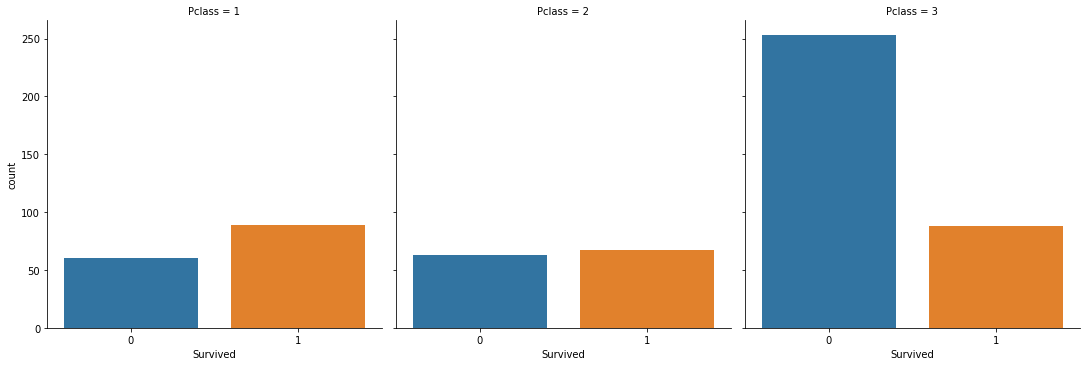

In [32]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=train,);

Pclass = 3 had the worst survival rate. (Expected because of the socio-economic inequalities)

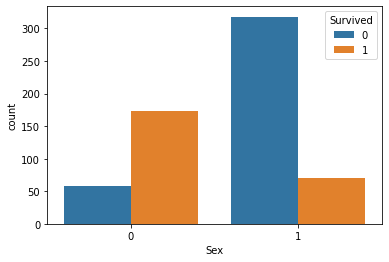

In [33]:
sns.countplot(data=train,x='Sex',hue='Survived');

0 corresponds to female and 1 corresponds to male.
It can be inferred female had better survival rate.

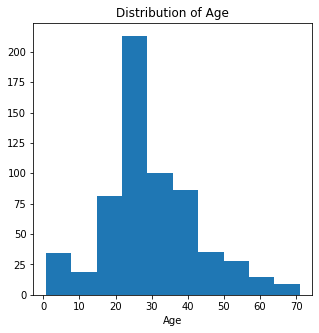

In [34]:
plt.figure(figsize=(5,5))
plt.hist(train['Age'])
plt.title('Distribution of Age')
plt.xlabel("Age")
plt.show()

Age Distribution on the ship

### Adding the Prediction Column

In [35]:
test['Prediction'] = out["Survived"].to_numpy()

test.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Prediction
0,621,0,3,1,27.0,1,0,14.4542,0
1,622,1,1,1,42.0,1,0,52.5542,0
2,623,1,3,1,20.0,1,1,15.7417,0
3,624,0,3,1,21.0,0,0,7.8542,0
4,625,0,3,1,21.0,0,0,16.1000,0
5,626,0,1,1,61.0,0,0,32.3208,0
6,627,0,2,1,57.0,0,0,12.3500,0
7,628,1,1,0,21.0,0,0,77.9583,1
8,629,0,3,1,26.0,0,0,7.8958,0
9,630,0,3,1,24.0,0,0,7.7333,0


In [36]:
test.to_csv('Output.csv',index=False)